# Load neccesary libraries and the data

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

action = pd.read_csv('mooc_actions.tsv', sep  = '\t')
feat = pd.read_csv('mooc_action_features.tsv', sep  = '\t')
label = pd.read_csv('mooc_action_labels.tsv', sep  = '\t')

In [18]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411749 entries, 0 to 411748
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   ACTIONID  411749 non-null  int64
 1   LABEL     411749 non-null  int64
dtypes: int64(2)
memory usage: 6.3 MB


### Merge the files into one single file

In [19]:
combined = pd.merge(pd.merge(action, feat, on = 'ACTIONID', how = 'inner'), label, on = 'ACTIONID', how = 'inner')

In [20]:
combined.head(10)

,ACTIONID,USERID,TARGETID,TIMESTAMP,FEATURE0,FEATURE1,FEATURE2,FEATURE3,LABEL
0,0,0,0,0.0,-0.319991,-0.435701,0.106784,-0.067309,0
1,1,0,1,6.0,-0.319991,-0.435701,0.106784,-0.067309,0
2,2,0,2,41.0,-0.319991,-0.435701,0.106784,-0.067309,0
3,3,0,1,49.0,-0.319991,-0.435701,0.106784,-0.067309,0
4,4,0,2,51.0,-0.319991,-0.435701,0.106784,-0.067309,0
5,5,0,3,55.0,-0.319991,-0.435701,0.106784,-0.067309,0
6,6,0,4,59.0,-0.319991,-0.435701,0.106784,-0.067309,0
7,7,0,5,62.0,-0.319991,-0.435701,0.106784,-0.067309,0
8,8,0,6,65.0,-0.319991,-0.435701,0.106784,-0.067309,0
9,9,0,7,113.0,-0.319991,-0.435701,1.108826,12.777235,0


In [21]:
combined.to_csv('Combined_File.csv')

# RESEARCH QUESTION 1: Does network centrality correlates with user engagement

Correlation between Degree Centrality and Engagement: 0.579
Correlation between Betweenness Centrality and Engagement: 0.024
Correlation between Eigenvector Centrality and Engagement: 0.024


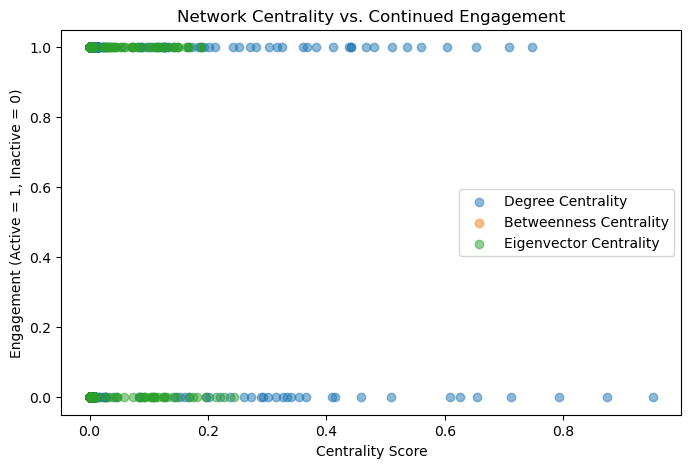

In [22]:
from scipy.stats import spearmanr

# Load the dataset
df = pd.read_csv("mooc_actions.tsv", sep="\t")

# Build the directed network graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['USERID'], row['TARGETID'], timestamp=row['TIMESTAMP'])


# Compute network centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Aggregate user activity over time
user_activity = df.groupby("USERID")["TIMESTAMP"].count()

# Identify long-term engagement (users with activity in later timestamps)
latest_timestamp = df["TIMESTAMP"].max()
active_users = df[df["TIMESTAMP"] > latest_timestamp * 0.75]["USERID"].unique()
engagement = {user: 1 if user in active_users else 0 for user in G.nodes()}

# Create DataFrame for correlation analysis
data = pd.DataFrame({
    "degree_centrality": [degree_centrality.get(user, 0) for user in G.nodes()],
    "betweenness_centrality": [betweenness_centrality.get(user, 0) for user in G.nodes()],
    "eigenvector_centrality": [eigenvector_centrality.get(user, 0) for user in G.nodes()],
    "engagement": [engagement.get(user, 0) for user in G.nodes()]
})

# Compute correlation between centrality and engagement
corr_deg, _ = spearmanr(data["degree_centrality"], data["engagement"])
corr_bet, _ = spearmanr(data["betweenness_centrality"], data["engagement"])
corr_eig, _ = spearmanr(data["eigenvector_centrality"], data["engagement"])

# Print results
print(f"Correlation between Degree Centrality and Engagement: {corr_deg:.3f}")
print(f"Correlation between Betweenness Centrality and Engagement: {corr_bet:.3f}")
print(f"Correlation between Eigenvector Centrality and Engagement: {corr_eig:.3f}")

# Scatter plot for visualization
plt.figure(figsize=(8, 5))
plt.scatter(data["degree_centrality"], data["engagement"], alpha=0.5, label="Degree Centrality")
plt.scatter(data["betweenness_centrality"], data["engagement"], alpha=0.5, label="Betweenness Centrality")
plt.scatter(data["eigenvector_centrality"], data["engagement"], alpha=0.5, label="Eigenvector Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Engagement (Active = 1, Inactive = 0)")
plt.legend()
plt.title("Network Centrality vs. Continued Engagement")
plt.show()


# RQ 2: Determine whether the level of activity by a user influences their likelihood of dropping out,

        count       mean        std  min    25%   50%   75%    max
LABEL                                                             
0      6988.0  58.428592  57.960459  5.0  13.00  38.0  88.0  505.0
1        58.0  53.948276  51.038143  5.0  13.25  36.0  85.0  199.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_1408\1351622111.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["LABEL"], y=data["activity_level"], palette=["red", "green"])


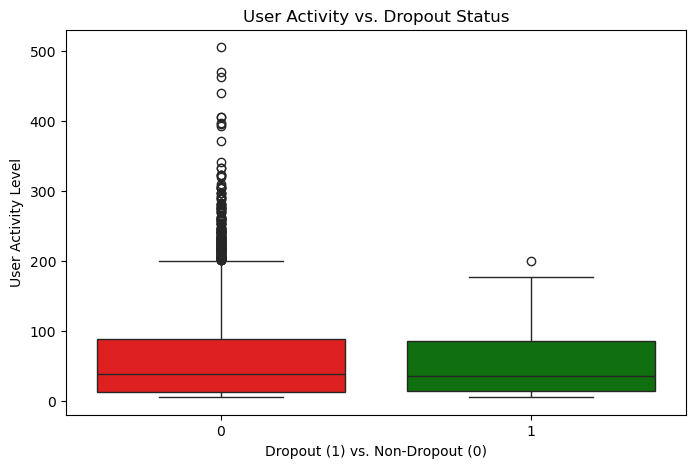

T-test Statistic: 0.665, P-value: 0.50868
Logistic Regression Accuracy: 0.987


In [23]:
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the datasets

df_actions = pd.read_csv("mooc_actions.tsv", sep="\t")
df_labels = pd.read_csv("mooc_action_labels.tsv", sep="\t")

# Aggregate activity level per user
user_activity = df_actions.groupby("USERID").size().reset_index(name="activity_level")

# Merge with dropout labels
df_labels = df_labels.rename(columns={"ACTIONID": "USERID"})  # Adjust column name if necessary
data = user_activity.merge(df_labels, on="USERID")

# Descriptive statistics
print(data.groupby("LABEL")["activity_level"].describe())

# Boxplot to visualize activity levels for dropouts vs. non-dropouts
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["LABEL"], y=data["activity_level"], palette=["red", "green"])
plt.xlabel("Dropout (1) vs. Non-Dropout (0)")
plt.ylabel("User Activity Level")
plt.title("User Activity vs. Dropout Status")
plt.show()

# Perform t-test to see if activity level significantly differs
inactive_users = data[data["LABEL"] == 1]["activity_level"]
active_users = data[data["LABEL"] == 0]["activity_level"]
t_stat, p_value = ttest_ind(active_users, inactive_users, equal_var=False)
print(f"T-test Statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

# Logistic Regression to predict dropout based on activity level
X = data[["activity_level"]]
y = data["LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.3f}")

# RQ3: How do user interactions (USERID → TARGETID) form distinct learning communities, and how do these communities influence student retention

### Builds the Network: Treats USERID → TARGETID as directed edges in a graph.
### Detects Communities: Uses Louvain modularity to cluster learners into communities based on interaction patterns.
### Analyzes Retention Rates: Computes dropout rates per community (mean of LABEL where 1 = dropped out, 0 = retained).
### Plots a bar chart to visualize dropout rates across different learning communities.
###  Expected Outcome:
Some communities will have low dropout rates (strong engagement).
Others may show high dropout rates, possibly due to weak interactions.

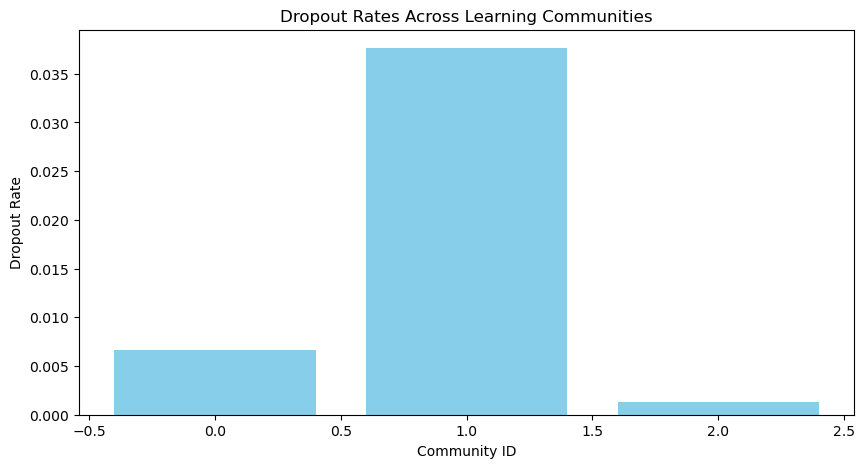

In [ ]:
from community import community_louvain  # Louvain community detection

# Load dataset
df = pd.read_csv(file_path)

# Create a directed graph
G = nx.DiGraph()

# Add edges from USERID to TARGETID (interactions)
for _, row in df.iterrows():
    G.add_edge(row['USERID'], row['TARGETID'])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G.to_undirected())  # Convert to undirected for community detection

# Add communities to a dataframe
df['Community'] = df['USERID'].map(partition)

# Analyze dropout rates per community
dropout_rates = df.groupby('Community')['LABEL'].mean()

# Plot the dropout rates
plt.figure(figsize=(10, 5))
plt.bar(dropout_rates.index, dropout_rates.values, color='skyblue')
plt.xlabel("Community ID")
plt.ylabel("Dropout Rate")
plt.title("Dropout Rates Across Learning Communities")
plt.show()

# Network Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
colors = [partition[node] if node in partition else 0 for node in G.nodes()]
nx.draw(G, pos, node_color=colors, cmap=plt.cm.rainbow, with_labels=False, node_size=50, edge_color='gray', alpha=0.6)
plt.title("MOOC Interaction Network with Detected Communities")
plt.show() 

# Print summary statistics
print("Community-wise Dropout Rates:\n", dropout_rates.sort_values())


# RQ4: What types of target activities (TARGETID) are most frequently interacted with by students who complete the course?"

### Filter students who completed the course by selecting rows where LABEL == 0.
### Count interactions per TARGETID using .value_counts().
### Extract the top 10 most interacted TARGETIDs using .head(10).
### Plot the results using Matplotlib to visualize which activities are most popular.

In [ ]:

# Load dataset
df = pd.read_csv(file_path)

# Step 1: Filter students who completed the course (LABEL == 0)
completed_students = df[df['LABEL'] == 0]

# Step 2: Count interactions per TARGETID
target_counts = completed_students['TARGETID'].value_counts()

# Step 3: Get the top 10 most interacted TARGETIDs
top_targets = target_counts.head(10)

# Step 4: Visualize results
plt.figure(figsize=(10,5))
top_targets.plot(kind='bar', color='skyblue')
plt.xlabel('TARGETID')
plt.ylabel('Interaction Count')
plt.title('Top 10 Most Interacted TARGETIDs by Students Who Completed the Course')
plt.xticks(rotation=45)
plt.show()


# Step 4: Get the top 10 least interacted TARGETIDs
least_targets = target_counts.tail(10)

# Step 6: Visualize results
plt.figure(figsize=(10,5))
least_targets.plot(kind='bar', color='green')
plt.xlabel('TARGETID')
plt.ylabel('Interaction Count')
plt.title('Least 10 Interacted TARGETIDs by Students Who Completed the Course')
plt.xticks(rotation=45)
plt.show()


# RQ5: Do more student exhibit consistent engagement over time or does a greater number show intermittent or late engagement?

In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv(file_path)

# Convert timestamp to a meaningful time unit (e.g., weeks)
df['Week'] = df['TIMESTAMP'] // (7 * 24 * 60 * 60)  # Convert seconds to weeks

# Count number of actions per user per week
user_activity = df.groupby(['USERID', 'Week']).size().reset_index(name='ActionCount')

# Compute engagement consistency (mean and standard deviation of activity per user)
engagement_stats = user_activity.groupby('USERID')['ActionCount'].agg(['mean', 'std']).reset_index()
engagement_stats.fillna(0, inplace=True)  # Replace NaN with 0 for inactive users

# Ensure at least two unique bin edges for qcut
if engagement_stats['std'].nunique() > 2:
    num_bins = min(4, engagement_stats['std'].nunique())  # Ensure valid bins
    bin_labels = ['Consistent', 'Moderate', 'Intermittent', 'Late'][:num_bins - 1]  # Labels must be one fewer than bins
    engagement_stats['Engagement_Type'] = pd.qcut(engagement_stats['std'], q=num_bins, labels=bin_labels, duplicates='drop')
else:
    engagement_stats['Engagement_Type'] = 'Consistent'  # Default if all std values are the same

# Merge engagement stats with original dataset to include labels (dropout status)
df = df.merge(engagement_stats[['USERID', 'Engagement_Type']], on='USERID', how='left')

# Compute retention rates for each engagement type
retention_rates = df.groupby('Engagement_Type')['LABEL'].mean()

# Count number of users in each engagement category
user_counts = engagement_stats['Engagement_Type'].value_counts()
per_counts = (user_counts/ sum(user_counts))*100
print("Percentage counts per engagement type:")
print(per_counts)



# RQ6: Is there a significnat difference in the drop out rates according to the level of engament of the students at the 5% significance level 

In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv(file_path)

# Convert timestamp to a meaningful time unit (e.g., weeks)
df['Week'] = df['TIMESTAMP'] // (7 * 24 * 60 * 60)  # Convert seconds to weeks

# Count number of actions per user per week
user_activity = df.groupby(['USERID', 'Week']).size().reset_index(name='ActionCount')

# Compute engagement consistency (mean and standard deviation of activity per user)
engagement_stats = user_activity.groupby('USERID')['ActionCount'].agg(['mean', 'std']).reset_index()
engagement_stats.fillna(0, inplace=True)  # Replace NaN with 0 for inactive users

# Ensure at least two unique bin edges for qcut
if engagement_stats['std'].nunique() > 2:
    num_bins = min(4, engagement_stats['std'].nunique())  # Ensure valid bins
    bin_labels = ['Consistent', 'Moderate', 'Intermittent', 'Late'][:num_bins - 1]  # Labels must be one fewer than bins
    engagement_stats['Engagement_Type'] = pd.qcut(engagement_stats['std'], q=num_bins, labels=bin_labels, duplicates='drop')
else:
    engagement_stats['Engagement_Type'] = 'Consistent'  # Default if all std values are the same

# Merge engagement stats with original dataset to include labels (dropout status)
df = df.merge(engagement_stats[['USERID', 'Engagement_Type']], on='USERID', how='left')

# Compute retention rates for each engagement type
retention_rates = df.groupby('Engagement_Type')['LABEL'].mean()

# Plot retention rates
plt.figure(figsize=(8, 5))
sns.barplot(x=retention_rates.index, y=retention_rates.values, palette='viridis')
plt.xlabel("Engagement Type")
plt.ylabel("Retention Rate (1 - Dropout Rate)")
plt.title("Student Retention Rates by Engagement Type")
plt.show()

# Print retention rates
print("Retention rates for each engagement type:\n", retention_rates)

# Statistical significance test among Consistent, Moderate, and Intermittent engagement groups
selected_groups = ['Consistent', 'Moderate', 'Intermittent']
contingency_table = pd.crosstab(df['Engagement_Type'], df['LABEL'])
contingency_table = contingency_table.loc[contingency_table.index.isin(selected_groups)]

if not contingency_table.empty and len(contingency_table) > 1:
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test result: chi2={chi2}, p-value={p}")
    if p < 0.05:
        print("There is a statistically significant difference in dropout rates among Consistent, Moderate, and Intermittent engagement groups.")
    else:
        print("No statistically significant difference in dropout rates among Consistent, Moderate, and Intermittent engagement groups.")
else:
    print("Insufficient data for statistical test among selected engagement groups.")

# Network Visualization with Engagement Type Colors
G = nx.DiGraph()

# Create a mapping of user engagement types
engagement_dict = engagement_stats.set_index('USERID')['Engagement_Type'].to_dict()
color_map = {'Consistent': 'blue', 'Moderate': 'green', 'Intermittent': 'orange', 'Late': 'red'}

# Add edges from USERID to TARGETID (interactions)
for _, row in df.iterrows():
    G.add_edge(row['USERID'], row['TARGETID'])

# Generate network layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization

# Assign colors to nodes based on engagement type
node_colors = [color_map.get(engagement_dict.get(node, 'Late'), 'gray') for node in G.nodes()]

# Draw network graph
nx.draw(G, pos, node_color=node_colors, node_size=10, edge_color='gray', alpha=0.6, with_labels=False)
plt.title("MOOC Interaction Network Colored by Engagement Type")

# Create a legend
legend_labels = [mpatches.Patch(color=color, label=etype) for etype, color in color_map.items()]
plt.legend(handles=legend_labels, title="Engagement Type")
plt.show()
